In [224]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [348]:
x_exact = np.linalg.inv(A4).dot(b)
def steepest_descent(A, b, x0, tol, imax):
    """
    Arguments:
        A: nxn numpy matrix.
        b: n dimensional numpy vector.
        x0: An initial solution guess for the solver to start with.
        tol: The maximum discrepancy acceptable to regard the current solution as fitting.
    Returns:
        i: final iteration number.
        x1: solution vector of dimension n.
        rn, n: lists of residual norms and iterations.
        rk: final residual norm.
    """
    x1 = x0
    rn = []  # list of residual norms
    n = []   # list of iterations
    for i in range(imax):
        x0 = x1
        gk = np.dot(A,x0) - b
        rk = -gk # residual is the negative gradient
        n.append(i)
        rn.append(np.linalg.norm(rk,2)) # add in the 2 norm to the list of residual norms
        a_k = (np.transpose(gk).dot(gk))/((np.transpose(gk).dot(A)).dot(gk))
        x1 = x0 - a_k*gk
        xk = x0 - x_exact
        if np.linalg.norm(rk,2) < tol:
            return i,rk,x1,n,rn,xk
    print('Steepest descent failed - max number of iterations reached.')
    return i,rk,x1,n,rn,xk


def conjugate_gradient(A, b, x0, tol, imax):
    """
    Arguments:
        A: nxn numpy matrix.
        b: n dimensional numpy vector.
        x0: An initial solution guess for the solver to start with.
        tol: The maximum discrepancy acceptable to regard the current solution as fitting.
    Returns:
        i: final iteration number.
        x1: solution vector of dimension n.
        rn, n: lists of residual norms and iterations.
        rk: final residual norm.
    """
    x1 = x0
    rn = []  # list of residual norms
    n = []   # list of iterations
    r0 = b
    rk = r0
    p0 = r0
    p1 = p0
    for i in range(imax):
        x0 = x1
        r0 = rk
        p0 = p1
        a_k = (np.transpose(r0).dot(r0))/((np.transpose(p0).dot(A)).dot(p0)) # step length
        n.append(i)
        rn.append(np.linalg.norm(rk,2)) # add in the 2 norm to the list of residual norms
        x1 = x0 + a_k*p0
        
        if np.linalg.norm(rk,2) < tol:
            return i,rk,x1,n,rn
        rk = r0 - a_k*(A.dot(p0))
        b_k = (np.transpose(rk).dot(rk))/(np.transpose(r0).dot(r0)) # relative residual b/w iterations
        p1 = rk + b_k*p0 # new search direction
    print('Conjugate gradient failed - max number of iterations reached.')
    return i,rk,x1,n,rn

In [73]:
# build A
import random 

tau = np.array([0.01,0.05,0.1,0.2])
A = np.zeros((500,500))
np.fill_diagonal(A,1) #set the diagonal values to 1

for i in range(500):
    j = i + 1
    while j > i and j < 500: #entries above the diagonal
        random.seed() # make random numbers
        A[i,j] = random.uniform(-1,1)
        A[j,i] = A[i,j] #make A symmetric
        j = j+1

In [333]:
A1 = np.copy(A)
for i in range(500):
    j = i + 1
    while j > i and j < 500: #entries above the diagonal
        if np.abs(A1[i,j]) > tau[0]:
            A1[i,j] = 0
            A1[j,i] = 0
        j = j + 1
A2 = np.copy(A)
for i in range(500):
    j = i + 1
    while j > i and j < 500: #entries above the diagonal
        if np.abs(A2[i,j]) > tau[1]:
            A2[i,j] = 0
            A2[j,i] = 0
        j = j + 1
A3 = np.copy(A)
for i in range(500):
    j = i + 1
    while j > i and j < 500: #entries above the diagonal
        if np.abs(A3[i,j]) > tau[2]:
            A3[i,j] = 0
            A3[j,i] = 0
        j = j + 1
A4 = np.copy(A)
for i in range(500):
    j = i + 1
    while j > i and j < 500: #entries above the diagonal
        if np.abs(A4[i,j]) > tau[3]:
            A4[i,j] = 0
            A4[j,i] = 0
        j = j + 1

In [75]:
# make b a random vector 
b = np.zeros(500)
for i in range(500):
    random.seed()
    b[i] = random.uniform(-1,1)
x0 = np.zeros(500)

In [218]:
print("For SD, the number of iterations for:")
print("solving A1x=b:", i_1)
print("solving A2x=b:",i_2)
print("solving A3x=b:",i_3)
print("solving A4x=b:",i_4)

For SD, the number of iterations for:
solving A1x=b: 5
solving A2x=b: 14
solving A3x=b: 78
solving A4x=b: 999


Steepest descent failed - max number of iterations reached.


<ipython-input-348-1bbcbdb7a7eb>:24: RuntimeWarning: invalid value encountered in double_scalars
  a_k = (np.transpose(gk).dot(gk))/((np.transpose(gk).dot(A)).dot(gk))


Text(0.5, 1.0, 'Steepest Descent: Iterations vs Residuals')

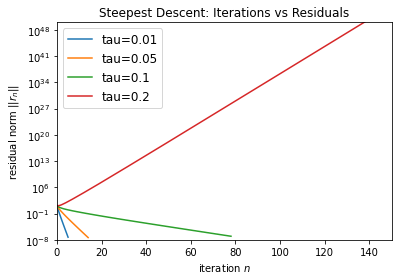

In [349]:
# Solve systems with Steepest Descent
i_1, rk_1, sol_1SD, n1, rn1, xk1 = steepest_descent(A1, b, x0, 1e-7, 1000) # returns i,rk,x1,n,rn,xk
i_2, rk_2, sol_2SD, n2, rn2, xk2 = steepest_descent(A2, b, x0, 1e-7, 1000)
i_3, rk_3, sol_3SD, n3, rn3, xk3 = steepest_descent(A3, b, x0, 1e-7, 1000)
i_4, rk_4, sol_4SD, n4, rn4, xk4 = steepest_descent(A4, b, x0, 1e-7, 1000)
#plt.figure(figsize=(6,4))
plt.semilogy(n1, rn1, label = 'tau=0.01')
plt.semilogy(n2, rn2, label = 'tau=0.05')
plt.semilogy(n3, rn3, label = 'tau=0.1')
plt.semilogy(n4, rn4, label = 'tau=0.2')
plt.xlim(0,150)
plt.ylim(1e-8,1e50)
plt.xlabel(r"iteration $n$")
plt.ylabel(r"residual norm $||r_n||$")
plt.legend( prop={'size': 12})
plt.title("Steepest Descent: Iterations vs Residuals")
#plt.savefig('hw6-2b.pdf')

Text(0.5, 1.0, 'Conjugate Gradient: Iterations vs Residuals')

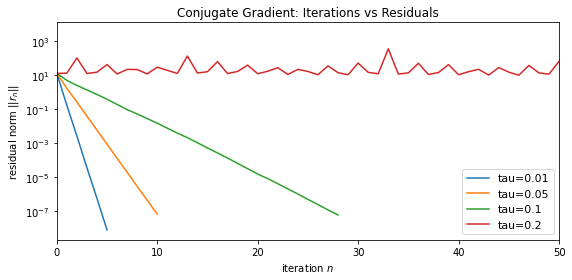

In [350]:
# Solve systems with Conjugate Gradient
i_1, rk_1, sol_1CG, n1, rn1 = conjugate_gradient(A1, b, x0, 1e-7, 1000) # returns i,rk,x1,n,rn
i_2, rk_2, sol_2CG, n2, rn2 = conjugate_gradient(A2, b, x0, 1e-7, 1000)
i_3, rk_3, sol_3CG, n3, rn3 = conjugate_gradient(A3, b, x0, 1e-7, 1000)
i_4, rk_4, sol_4CG, n4, rn4 = conjugate_gradient(A4, b, x0, 1e-7, 1000)
plt.figure(figsize=(9,4))
plt.semilogy(n1, rn1, label = 'tau=0.01')
plt.semilogy(n2, rn2, label = 'tau=0.05')
plt.semilogy(n3, rn3, label = 'tau=0.1')
plt.semilogy(n4, rn4, label = 'tau=0.2')
plt.xlim(0,50)
#plt.ylim(0,1e44)
plt.xlabel(r"iteration $n$")
plt.ylabel(r"residual norm $||r_n||$")
plt.legend( prop={'size': 11})
plt.title("Conjugate Gradient: Iterations vs Residuals")
#plt.savefig('hw6-2c2.pdf')

In [216]:
print("For CG, the number of iterations for:")
print("solving A1x=b:", i_1)
print("solving A2x=b:",i_2)
print("solving A3x=b:",i_3)
print("solving A4x=b:",i_4)

For CG, the number of iterations for:
solving A1x=b: 5
solving A2x=b: 10
solving A3x=b: 28
solving A4x=b: 766


In [352]:
x_exact4 = np.linalg.inv(A4).dot(b)
maxeig = max(np.abs(np.linalg.eig(A4)[0]))
mineig = min(np.abs(np.linalg.eig(A4)[0]))
k = np.linalg.cond(A4)
class_boundSD = ((maxeig-mineig)/(maxeig+mineig))*(np.transpose(xk4).dot(A4).dot(xk4))
class_boundCG = 2*((1-np.sqrt(k**(-1)))/(1+np.sqrt(k**(-1))))**i_4*(np.transpose(x_exact4).dot(A4).dot(x_exact4))

print("For A_4 with tau = 0.2: \n")
print("Max eigenvalue =", maxeig)
print("Min eigenvalue =", mineig)
print("The condition number =", k)
print("(SD) The residual norm of our solution =", np.linalg.norm(x_exact4-sol_4SD))
print("(CG) The residual norm of our solution =", np.linalg.norm(x_exact4-sol_4CG))
print("The SD error bound from class =", class_boundSD)
print("The CG error bound from class =", class_boundCG)

For A_4 with tau = 0.2: 

Max eigenvalue = 3.27564158687161
Min eigenvalue = 0.001316950178038677
The condition number = 2487.2934766191665
(SD) The residual norm of our solution = nan
(CG) The residual norm of our solution = 3.3179025162193356e-07
The SD error bound from class = nan
The CG error bound from class = 1.4257476264109596e-11
